In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/uzreport-uz-scraped-dataset/uzreport_uz_original.csv')

In [3]:
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count
0,Xitoy kompaniyasi Toshkentdagi 30 ta yirik kor...,2023-05-02 12:46:01,422,0,0,0,0,0,0,0,0,0
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,2236,7,13,0,0,3,0,0,0,0
2,Namangan viloyati hokimiga birinchi o‘rinbosar...,2023-05-02 12:15:52,3626,3,5,0,0,0,0,0,0,0
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,4482,9,2,0,0,0,0,0,0,0
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,5952,15,0,0,0,26,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20143 entries, 0 to 20142
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             20143 non-null  object
 1   date             20143 non-null  object
 2   view_count       20143 non-null  int64 
 3   like_count       20143 non-null  int64 
 4   dislike_count    20143 non-null  int64 
 5   love_count       20143 non-null  int64 
 6   fire_count       20143 non-null  int64 
 7   happy_count      20143 non-null  int64 
 8   shocked_count    20143 non-null  int64 
 9   sad_count        20143 non-null  int64 
 10  party_count      20143 non-null  int64 
 11  star_eyes_count  20143 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 1.8+ MB


In [5]:
df.describe()

,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count
count,20143.000000,20143.000000,20143.000000,20143.0,20143.000000,20143.000000,20143.000000,20143.000000,20143.000000,20143.000000
mean,18628.387132,34.523060,8.666038,0.0,2.714640,7.655215,3.473663,3.154843,0.686889,0.964057
std,18708.543548,38.110126,20.184422,0.0,50.023114,17.931356,10.204443,14.021856,4.043676,4.912995
min,422.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14117.000000,15.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16160.000000,24.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,18440.500000,39.000000,8.000000,0.0,1.000000,6.000000,2.000000,0.000000,0.000000,0.000000
max,633451.000000,782.000000,439.000000,0.0,4472.000000,318.000000,291.000000,425.000000,261.000000,414.000000


In [6]:
df['date'] = pd.to_datetime(df['date'])

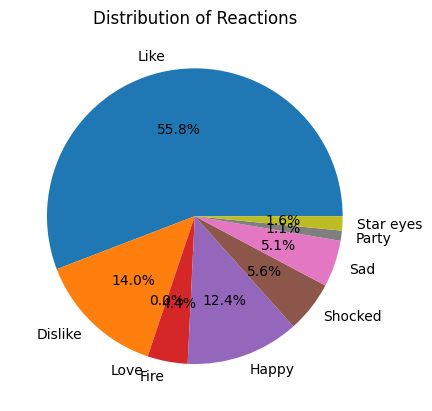

In [7]:
emoji_counts = [df['like_count'].sum(),
                df['dislike_count'].sum(),
                df['love_count'].sum(),
                df['fire_count'].sum(),
                df['happy_count'].sum(),
                df['shocked_count'].sum(),
                df['sad_count'].sum(),
                df['party_count'].sum(),
                df['star_eyes_count'].sum(),
                ]

emoji_labels = ['Like', 'Dislike', 'Love', 'Fire', 'Happy', 'Shocked', 'Sad', 'Party', 'Star eyes', ]

plt.pie(emoji_counts, labels=emoji_labels, autopct='%1.1f%%')
plt.title('Distribution of Reactions')
plt.show()

# Data cleaning

In [8]:
df['total_reactions'] = df['like_count'] + df['dislike_count'] + df['love_count'] + df['fire_count'] + df[
    'happy_count'] + df['shocked_count'] + df['sad_count'] + df['party_count'] + df['star_eyes_count']

df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions
0,Xitoy kompaniyasi Toshkentdagi 30 ta yirik kor...,2023-05-02 12:46:01,422,0,0,0,0,0,0,0,0,0,0
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,2236,7,13,0,0,3,0,0,0,0,23
2,Namangan viloyati hokimiga birinchi o‘rinbosar...,2023-05-02 12:15:52,3626,3,5,0,0,0,0,0,0,0,8
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,4482,9,2,0,0,0,0,0,0,0,11
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,5952,15,0,0,0,26,0,0,0,0,41


In [9]:
zero_reactions = df[df['total_reactions'] < 10]
zero_reactions.nunique()

text               318
date               326
view_count         323
like_count          10
dislike_count        6
love_count           1
fire_count           5
happy_count          3
shocked_count        6
sad_count            5
party_count          2
star_eyes_count      4
total_reactions     10
dtype: int64

In [10]:
df.isna().sum()

text               0
date               0
view_count         0
like_count         0
dislike_count      0
love_count         0
fire_count         0
happy_count        0
shocked_count      0
sad_count          0
party_count        0
star_eyes_count    0
total_reactions    0
dtype: int64

In [11]:
df[df['text'].str.contains('reklama', case=False)]

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions
46,Haj tadbirini tashkil etish vazifasi sayyohlik...,2023-05-01 15:00:37,10856,19,1,0,0,3,0,0,0,0,23
171,Avant PIR sendvich panellari: binolarni qurish...,2023-04-28 18:00:30,10866,8,0,0,0,0,0,0,0,0,8
349,Shivaki multi-split tizimlari: yuqori samarali...,2023-04-22 18:31:19,21497,31,0,0,0,3,0,0,0,0,34
452,"Muloqot imkoniyatlarini kengaytiring. Chunki ""...",2023-04-19 15:59:59,7890,14,0,0,0,0,0,0,0,0,14
776,2021-yilda 25 yoshgacha bo‘lgan yoshlarni ishg...,2023-04-11 17:05:56,9136,6,3,0,1,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19744,🚴‍♀️🚴🚴‍♂️ Eurosport’da O‘zbekistonning “Tashke...,2022-01-20 17:45:37,18589,13,0,0,3,6,1,0,0,0,23
19986,Minerva City'dan mega aksiyaga asosan 3 xonali...,2022-01-05 18:00:18,17459,7,14,0,0,2,4,0,5,0,32
20036,Baxtli boshlanishlar maskani - yangi yilda! Ha...,2021-12-29 16:29:56,18195,1,0,0,0,0,0,0,0,0,1
20049,MIMAR GROUP ISHGA TAKLIF QILADI\n\nYirik quril...,2021-12-27 15:00:57,20113,2,0,0,0,0,0,0,0,0,2


In [12]:
df.loc[df['text'].str.contains('reklama', na=False), 'promotional'] = 'yes'
df.loc[~df['text'].str.contains('reklama', na=False), 'promotional'] = 'no'

In [13]:
df.sample(5)

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional
15592,Respublikamizda ko'p qavatli uylardagi xonadon...,2022-07-10 20:01:52,20416,27,0,0,0,7,5,0,0,0,39,no
8418,Magnum'da foydali noyabr 🤩\n\nHurmatli xaridor...,2022-11-22 12:30:02,21366,13,0,0,1,0,0,0,0,0,14,no
4620,Parkentdan “Mashinasozlar” metro bekatiga eksp...,2023-01-27 17:10:38,18669,27,0,0,0,0,0,0,0,2,29,no
7441,Akademik Abdumavlon Abdullayev 92 yoshida vafo...,2022-12-08 13:34:52,15600,14,0,0,0,4,4,58,0,0,80,no
18078,"Toshkentning Olmazor tumanida ""Matiz"" avtomobi...",2022-04-09 10:46:59,17872,3,25,0,0,6,3,1,0,3,41,no


In [14]:
rows_to_drop = df[(df['promotional'] == 'no') & (df['total_reactions'] <= 9)]
rows_to_drop

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional
0,Xitoy kompaniyasi Toshkentdagi 30 ta yirik kor...,2023-05-02 12:46:01,422,0,0,0,0,0,0,0,0,0,0,no
2,Namangan viloyati hokimiga birinchi o‘rinbosar...,2023-05-02 12:15:52,3626,3,5,0,0,0,0,0,0,0,8,no
7,Toshkentda isitish tarmoqlari issiq suv ta’min...,2023-05-02 11:00:52,7017,9,0,0,0,0,0,0,0,0,9,no
64,"Anons\nSeshanba soat 21:30 da Uzreport tvda ""F...",2023-05-01 08:36:02,14760,6,2,0,0,0,0,0,0,0,8,no
171,Avant PIR sendvich panellari: binolarni qurish...,2023-04-28 18:00:30,10866,8,0,0,0,0,0,0,0,0,8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20138,Kunning muhim xabarlari:\n\n▶️ UZREPORT TV bok...,2021-10-14 20:51:51,232597,1,0,0,0,0,0,0,0,0,1,no
20139,Infarkt va koronavirusni boshdan o'tkazgan 90 ...,2021-10-14 17:45:04,22158,1,0,0,0,0,0,0,0,0,1,no
20140,"""Yanada vatanparvarroq bo‘laylik, migrantlar h...",2021-10-14 15:41:13,17842,0,1,0,0,0,0,0,0,0,1,no
20141,"Bundan buyon ""Muradov Professional ligasi""ning...",2021-10-05 23:59:21,20592,0,0,0,0,0,0,1,0,0,1,no


In [15]:
# before dropping
df.shape

(20143, 14)

In [16]:
# drop non-promotional news with total reactions less than 10
df = df.drop(df[(df['promotional'] == 'no') & (df['total_reactions'] < 10)].index)
# after dropping
df.shape

(19817, 14)

In [17]:
df['promotional'].value_counts()

no     19774
yes       43
Name: promotional, dtype: int64

# Data labeling

In [18]:
weights = {
    'like': 1,
    'dislike': -1,
    'love': 2,
    'fire': 1.5,
    'happy': 1.5,
    'shocked': -1.5,
    'sad': -1.5,
    'party': 1,
    'star_eyes': 0.5,
}

# calculate the total weighted reactions for each row
df['total_weighted_reactions'] = df['like_count'] * weights['like'] + df['dislike_count'] * weights['dislike'] + df[
    'love_count'] * weights['love'] + df['fire_count'] * weights['fire'] + df['happy_count'] * weights['happy'] + df[
                                     'shocked_count'] * weights['shocked'] + df['sad_count'] * weights['sad'] + df[
                                     'party_count'] * weights['party'] + df['star_eyes_count'] * weights['star_eyes']

# define the threshold values
positive_threshold = 1
negative_threshold = -1

# cassify the sentiment based on the total weighted reactions
df['sentiment'] = df['total_weighted_reactions'].apply(
    lambda x: 'positive' if x >= positive_threshold else ('negative' if x <= negative_threshold else 'neutral'))

print(df['sentiment'].value_counts())

positive    16228
negative     3502
neutral        87
Name: sentiment, dtype: int64


In [19]:
df[df['sentiment'] == 'neutral']

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional,total_weighted_reactions,sentiment
202,Toshkentda 4 ta yuk mashina va 8 ta avtomobil ...,2023-04-27 21:15:02,14166,14,0,0,0,0,8,1,0,0,23,no,0.5,neutral
685,Fransiya prezidenti Emmanuel Makron hayotiga s...,2023-04-13 12:19:52,12050,27,47,0,1,13,1,0,0,0,89,no,-0.5,neutral
1055,"7 nafar investor ""Dori Darmon""ning 51 foiz ulu...",2023-04-05 17:10:52,9375,9,14,0,0,2,0,0,0,3,28,no,-0.5,neutral
1331,Yevroparlament delegatsiyasi aprel oyi boshida...,2023-03-31 09:02:46,14842,27,32,0,0,3,0,0,1,0,63,no,0.5,neutral
1712,Toshkentda qariyb 10 kun davomida vaqti-vaqti ...,2023-03-24 08:39:58,15722,11,19,0,0,5,0,0,0,0,35,no,-0.5,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18957,FIFA Rossiyaning zo'ravonlik qilishini qoralad...,2022-02-25 10:16:14,23362,25,16,0,0,2,8,0,0,0,51,no,0.0,neutral
19011,“O‘zavtosanoat” boshqaruvi raisi Shavkat Umurz...,2022-02-23 12:05:18,17451,7,28,0,0,13,0,0,1,0,49,no,-0.5,neutral
19555,Angren shahriga yangi hokim tayinlandi\n\n👉 ht...,2022-01-31 14:06:04,20118,20,7,0,0,0,0,10,2,0,39,no,0.0,neutral
19981,To‘qayev Qozog‘iston Xavfsizlik kengashi rahba...,2022-01-05 19:59:26,19112,30,7,0,0,0,12,3,0,0,52,no,0.5,neutral


In [20]:
df[df['sentiment'] == 'positive']

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional,total_weighted_reactions,sentiment
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,4482,9,2,0,0,0,0,0,0,0,11,no,7.0,positive
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,5952,15,0,0,0,26,0,0,0,0,41,no,54.0,positive
6,O'zbekistonda 3 oy ichida umumiy ovqatlanish k...,2023-05-02 11:15:41,6728,12,3,0,0,0,1,0,0,0,16,no,7.5,positive
9,AQShda uchinchi yirik bank bankrot bo'ldi\n\nB...,2023-05-02 10:20:02,8157,27,1,0,0,1,3,0,7,0,39,no,30.0,positive
11,O‘zbekistonning yangi elchisi Jo Baydenga isho...,2023-05-02 09:30:29,8775,30,25,0,0,0,0,0,0,0,55,no,5.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,#Rasman. Mahmud Muradovning navbatdagi jangi e...,2022-01-03 18:00:09,29190,371,23,0,146,7,31,4,12,20,614,no,547.0,positive
20016,Abbosjon Mirzorahimov Kamoliddin Behzod nomida...,2022-01-03 14:28:25,25195,24,43,0,1,15,2,0,1,1,87,no,3.5,positive
20017,Ayni paytda O‘zbekiston Milliy Olimpiya qo‘mit...,2022-01-03 12:48:27,100568,75,6,0,13,2,0,5,22,12,135,no,112.0,positive
20020,Dehqonoboddagi maktab o‘qituvchisi MDHning “En...,2022-01-03 10:21:45,26976,31,1,0,0,0,0,2,0,4,38,no,29.0,positive


In [21]:
df[df['sentiment'] == 'negative']

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional,total_weighted_reactions,sentiment
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,2236,7,13,0,0,3,0,0,0,0,23,no,-1.5,negative
5,Endi 1-may Konstitutsiya kuni sifatida nishonl...,2023-05-02 11:31:41,6416,1,27,0,0,1,0,0,0,0,29,no,-24.5,negative
8,Lionel Messi Saudiya Arabistoniga bordi\n\nBat...,2023-05-02 10:40:33,34213,19,17,0,2,27,38,0,0,7,110,no,-8.0,negative
10,Toshkentda xorijdan olib kirilishi taqiqlangan...,2023-05-02 10:02:11,8291,7,5,0,0,0,5,0,0,0,17,no,-5.5,negative
15,2-may. O'zbekistonda harorat 37 darajagacha is...,2023-05-02 07:31:03,10538,9,0,0,0,0,12,0,0,0,21,no,-9.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,Apple dunyoda bozor qiymati 3 trillion dollarg...,2022-01-04 13:08:22,22918,41,16,0,27,0,104,3,0,7,198,no,-91.5,negative
20014,Samarqand va Namangan shaharlarining chegarala...,2022-01-03 17:25:49,26583,15,26,0,15,0,3,35,3,0,97,no,-42.5,negative
20015,Qashqadaryoda dahshatli YTH sodir boʻldi. Hayd...,2022-01-03 17:04:40,25512,14,9,0,0,0,92,74,0,0,189,no,-244.0,negative
20018,Quyuq tuman sababli O‘zbekiston aeroportlarida...,2022-01-03 11:42:55,24250,11,2,0,2,0,9,9,0,0,33,no,-15.0,negative


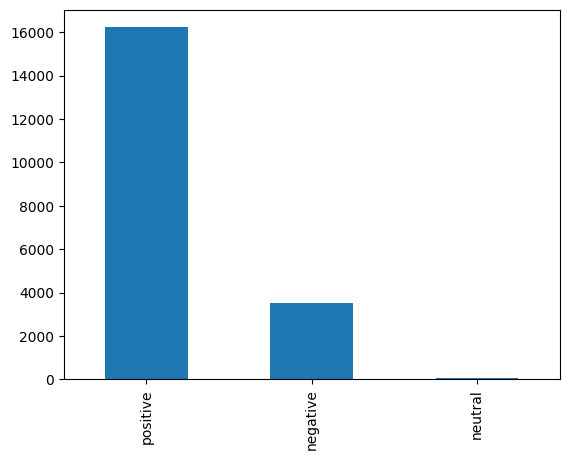

In [22]:
df['sentiment'].value_counts().plot(kind='bar');

In [23]:
# just drop neutral rows as we only have 87 of such
df = df[df['sentiment'] != 'neutral']

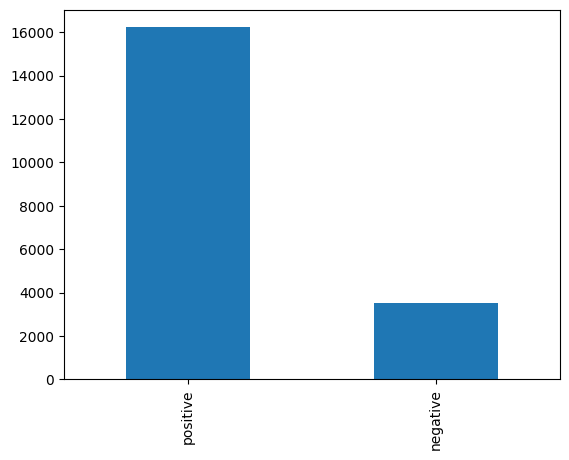

In [24]:
df['sentiment'].value_counts().plot(kind='bar');

In [25]:
# remove temp created column
df = df.drop(['total_weighted_reactions'], axis=1)

In [26]:
df.sample(5)

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional,sentiment
13868,Ukrainalik bokschi Aleksand Usik britaniyalik ...,2022-08-17 19:40:30,14004,44,13,0,4,6,0,0,0,0,67,no,positive
4402,Oyog’i singan Noyer qachon safga qaytishi mumk...,2023-01-31 16:01:13,14644,26,0,0,0,2,0,0,0,0,28,no,positive
19794,Koronavirus: kecha kasallanishlar biroz pasayd...,2022-01-18 11:19:04,20066,9,13,0,0,0,12,41,1,4,80,no,negative
14999,Ozarbayjon prezidenti Shavkat Mirziyoyevni tug...,2022-07-24 16:02:12,15815,44,8,0,0,0,0,0,0,0,52,no,positive
6483,Toshkent viloyatida uchta yuk mashinasi ishtir...,2022-12-23 21:30:00,17361,16,1,0,0,0,0,8,0,0,25,no,positive


In [27]:
df_filtered = df[(df['promotional'] == 'no')]

random_texts = df_filtered.sample(n=20, random_state=42)['text']
for text in random_texts:
    print(text)
    print('------------')

Rishi Sunak: Ukraina xalqi bizga ishonishi mumkin, doimo ular tomonida bo'lamiz!

Batafsil  👉 https://uzreport.news/world/rishi-sunak-bayden-bilan-ukrainani-qo-llab-quvvatlash-va-xitoy-yol-qo-yayotgan-muammolarni

@uzreport_uz
------------
Sog‘liqni saqlash vaziri Amrillo Inoyatov Turkiya universiteti faxriy professori bo‘ldi

Batafsil 👉 https://uzreport.news/society/sog-liqni-saqlash-vaziri-amrillo-inoyatov-turkiya-universiteti-faxriy-professori-bo-ldi

@uzreport_uz
------------
Ukraina bilan chegaradosh 8 ta hududdan o‘qishini ko‘chirishga istisno tariqasida ruxsat berilgan bir guruh talabalar bo‘yicha navbatdagi ro‘yxat tasdiqlandi

Ushbu ro‘yxatga kiritilgan talabalar o‘zlari hujjat topshirgan oliy ta’lim muassasasining o‘qishni ko‘chirish bo‘yicha mas’ullariga uchrashishlari so‘raladi.

Yaqin kunlarda navbatdagi ro‘yxat bo‘yicha qo‘shimcha ma’lumot e’lon qilinadi.

👉Ro‘yxatni yuklab olish

@uzreport_uz
------------
"Обзор мировых рынков" на телеканале UZREPORT TV. Сегодня мы вам р

In [28]:
# analyze most common patterns
username_mentions = df['text'].str.contains('@uzreport_uz').sum()
batafsil_mentions = df['text'].str.contains('Batafsil 👉|To‘liq  👉').sum()
yuklab_olish_mentions = df['text'].str.contains('yuklab olish').sum()
media_mentions = df['text'].str.contains("Facebook'da ko'rish|YouTube'da ko'rish|UzReport rasmiy sahifalari").sum()
questions_mentions = df['text'].str.contains("Savollaringizni @Muborak_Oy_bot orqali jo‘natishingiz mumkin|@Muborak_Oy_bot").sum()

print(f'Username mentions: {username_mentions}')
print(f'Batafsil mentions: {batafsil_mentions}')
print(f'Yuklab olish mentions: {yuklab_olish_mentions}')
print(f'Media mentions: {media_mentions}')
print(f'Questions mentions: {questions_mentions}')

Username mentions: 19311
Batafsil mentions: 12369
Yuklab olish mentions: 5
Media mentions: 28
Questions mentions: 27


In [29]:
def clean_text(text):
    patterns = r'@uzreport_uz|Batafsil 👉|To‘liq  👉|yuklab olish|Facebook\'da ko\'rish|YouTube\'da ko\'rish|UzReport rasmiy sahifalari|Savollaringizni @Muborak_Oy_bot orqali jo‘natishingiz mumkin|@Muborak_Oy_bot'
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = re.sub(patterns, '', text)
    text = emoji_pattern.sub(r'', text)
    return text

In [30]:
smpl_txt = df.iloc[4]['text']

In [31]:
clean_text(smpl_txt)

"O'zbekistonda 3 oy ichida umumiy ovqatlanish korxonalari 221 mlrd so‘mdan ortiq soliqlarni to‘ladi\n\n https://uzreport.news/economy/ozbekistonda-3-oy-ichida-umumiy-ovqatlanish-korxonalari-221-mlrd-so-mdan-ortiq-soliqlarni-\n\n"

In [32]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [33]:
df.sample(5)

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional,sentiment,cleaned_text
19552,Denov tumaniga yangi hokim tayinlandi\n\n👉 htt...,2022-01-31 16:17:10,20511,18,26,0,0,0,0,7,3,0,54,no,negative,Denov tumaniga yangi hokim tayinlandi\n\n http...
12909,Bugun abituriyentlardan apellatsiya arizalarin...,2022-09-06 13:30:46,16257,28,0,0,0,1,0,0,0,0,29,no,positive,Bugun abituriyentlardan apellatsiya arizalarin...
9433,"DXX ""opiy"" va ""gashish"" savdosi bilan shug'ull...",2022-11-04 15:45:07,16276,20,0,0,0,0,0,0,0,4,24,no,positive,"DXX ""opiy"" va ""gashish"" savdosi bilan shug'ull..."
19276,"Pochettino: ""Messi, Neymar va Mbappe bilan bir...",2022-02-11 17:34:28,18025,57,22,0,9,18,0,0,2,0,108,no,positive,"Pochettino: ""Messi, Neymar va Mbappe bilan bir..."
5656,Toshkent shahrida “Food city savdo majmuasi – ...,2023-01-10 13:15:04,16763,33,0,0,0,3,0,0,0,0,36,no,positive,Toshkent shahrida “Food city savdo majmuasi – ...


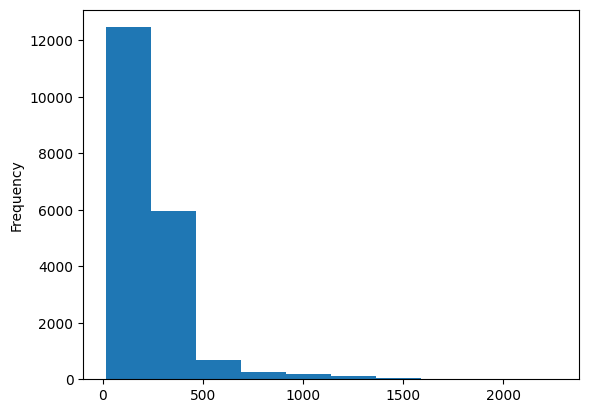

In [34]:
df['cleaned_text'].str.len().plot(kind='hist');

In [35]:
df['length'] = df['cleaned_text'].str.len()
print(df['length'].describe())

count    19730.000000
mean       263.710340
std        168.415032
min         14.000000
25%        189.000000
50%        223.000000
75%        270.000000
max       2266.000000
Name: length, dtype: float64


In [36]:
long_messages = df[df['length'] > 450]['cleaned_text']
long_messages.nunique()

1398

In [37]:
long_messages

38       O‘zbekiston Respublikasi referendumining yakun...
122       O‘zbekiston Respublikasining referedumida ovo...
123       O‘zbekiston Respublikasi Konstitutsiyaviy Qon...
191      FDG kompaniyasi 2023-yil aprel oyida o‘zining ...
224      Prezident Shavkat Mirziyoyev yalpi majlisdagi ...
                               ...                        
19900    Shavkat Mirziyoyev yo‘l infratuzilmasini yaxsh...
19954    Yunusobod: ta'mirlanishi chala qolgan ko'chala...
19958    Abdurahmon Chulonbayev - 13 yillik faoliyatida...
19977    Rahmatilla Zokirov: Otam hayotligida soz yasam...
19980    "Shunaqa bo'ldi, mayli, "oformit" qilsin. Jazo...
Name: cleaned_text, Length: 1407, dtype: object

In [38]:
max_length = 450

df['truncated_text'] = df['cleaned_text'].apply(lambda x: x[:max_length] if len(x) > max_length else x)

truncated_df = df[df['truncated_text'] != df['cleaned_text']]

truncated_df[['cleaned_text', 'truncated_text']].sample(5)

,cleaned_text,truncated_text
15779,Qoraqalpog‘istonda 4 nafar huquq-tartibot orga...,Qoraqalpog‘istonda 4 nafar huquq-tartibot orga...
11099,Kunning eng qaynoq sport va futbol yangilikla...,Kunning eng qaynoq sport va futbol yangilikla...
18003,"""Hududlarni dori vositalari bilan ta’minlangan...","""Hududlarni dori vositalari bilan ta’minlangan..."
17865,16 yoshga to'lgan maktab bitiruvchilari o'z va...,16 yoshga to'lgan maktab bitiruvchilari o'z va...
16900,Kunning eng qaynoq sport va futbol yangilikla...,Kunning eng qaynoq sport va futbol yangilikla...


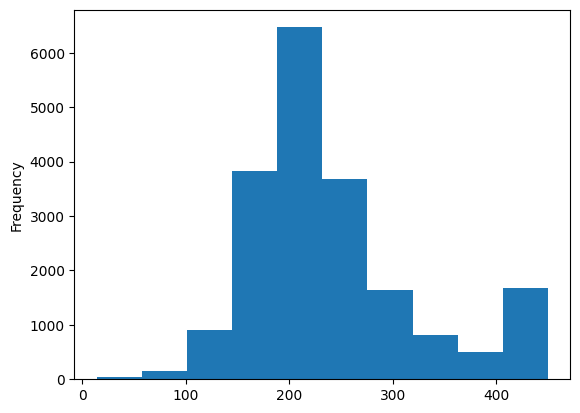

In [39]:
df['truncated_text'].str.len().plot(kind='hist');

In [40]:
df['length_tr'] = df['truncated_text'].str.len()
print(df['length_tr'].describe())

count    19730.000000
mean       241.921389
std         83.715362
min         14.000000
25%        189.000000
50%        223.000000
75%        270.000000
max        450.000000
Name: length_tr, dtype: float64


In [41]:
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional,sentiment,cleaned_text,length,truncated_text,length_tr
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,2236,7,13,0,0,3,0,0,0,0,23,no,negative,Finlyandiya o‘z hududida Amerika harbiy bazasi...,220,Finlyandiya o‘z hududida Amerika harbiy bazasi...,220
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,4482,9,2,0,0,0,0,0,0,0,11,no,positive,Bolgariya Bosh prokurori Ivan Geshevning hayot...,173,Bolgariya Bosh prokurori Ivan Geshevning hayot...,173
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,5952,15,0,0,0,26,0,0,0,0,41,no,positive,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",252,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",252
5,Endi 1-may Konstitutsiya kuni sifatida nishonl...,2023-05-02 11:31:41,6416,1,27,0,0,1,0,0,0,0,29,no,negative,Endi 1-may Konstitutsiya kuni sifatida nishonl...,255,Endi 1-may Konstitutsiya kuni sifatida nishonl...,255
6,O'zbekistonda 3 oy ichida umumiy ovqatlanish k...,2023-05-02 11:15:41,6728,12,3,0,0,0,1,0,0,0,16,no,positive,O'zbekistonda 3 oy ichida umumiy ovqatlanish k...,223,O'zbekistonda 3 oy ichida umumiy ovqatlanish k...,223


In [42]:
# drop extra columns
df = df.drop(columns=['length', 'cleaned_text', 'length_tr', 'text'])
df = df.rename(columns={'truncated_text': 'text'})
cols = df.columns.tolist()
cols = ['text'] + cols[:-1]
df = df[cols]
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional,sentiment
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,2236,7,13,0,0,3,0,0,0,0,23,no,negative
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,4482,9,2,0,0,0,0,0,0,0,11,no,positive
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,5952,15,0,0,0,26,0,0,0,0,41,no,positive
5,Endi 1-may Konstitutsiya kuni sifatida nishonl...,2023-05-02 11:31:41,6416,1,27,0,0,1,0,0,0,0,29,no,negative
6,O'zbekistonda 3 oy ichida umumiy ovqatlanish k...,2023-05-02 11:15:41,6728,12,3,0,0,0,1,0,0,0,16,no,positive


In [43]:
df = df.reindex(columns=['text', 'date', 'sentiment', 'promotional', 'view_count', 'like_count', 'dislike_count',
                         'love_count', 'fire_count', 'happy_count', 'shocked_count', 'sad_count', 'party_count',
                         'star_eyes_count', 'total_reactions'])
df.head()

,text,date,sentiment,promotional,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,negative,no,2236,7,13,0,0,3,0,0,0,0,23
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,positive,no,4482,9,2,0,0,0,0,0,0,0,11
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,positive,no,5952,15,0,0,0,26,0,0,0,0,41
5,Endi 1-may Konstitutsiya kuni sifatida nishonl...,2023-05-02 11:31:41,negative,no,6416,1,27,0,0,1,0,0,0,0,29
6,O'zbekistonda 3 oy ichida umumiy ovqatlanish k...,2023-05-02 11:15:41,positive,no,6728,12,3,0,0,0,1,0,0,0,16


In [44]:
df.to_csv('uzreport_uz_cleaned_labeled.csv', index=False)

In [45]:
compact_df = df[['text', 'date', 'sentiment', 'promotional']]
compact_df.head()

,text,date,sentiment,promotional
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,negative,no
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,positive,no
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,positive,no
5,Endi 1-may Konstitutsiya kuni sifatida nishonl...,2023-05-02 11:31:41,negative,no
6,O'zbekistonda 3 oy ichida umumiy ovqatlanish k...,2023-05-02 11:15:41,positive,no


In [46]:
compact_df.to_csv('uzreport_uz_cleaned_labeled_compact.csv', index=False)